# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def random_num():
    
    return np.random.choice(range(1,7), 10)

df=pd.DataFrame(random_num())


#### 2.- Plot the results sorted by value.

   0
7  2
0  4
1  4
6  4
8  4
5  5
9  5
2  6
3  6
4  6


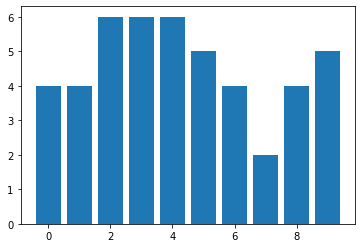

In [3]:
df.sort_values(by=0,inplace=True)
print(df)
plt.bar(df.index,df[0])
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

4    4
6    3
5    2
2    1
Name: 0, dtype: int64


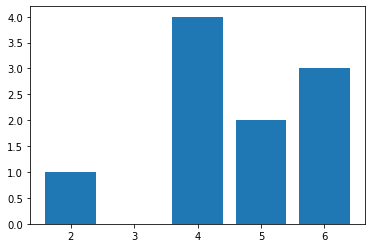

In [4]:
freq_dist=df[0].value_counts()
print(freq_dist)

plt.bar(freq_dist.index,freq_dist)
plt.show()

In [5]:
"""
It represent the same data but presented  in a different manner.
The 2nd plot organizes the data by bin and counts the frequency that the values appear.
If we sum all the dice outcomes from the 1st plot and do the sum of bin times freq. we get the same number (41)
"""

'\nIt represent the same data but presented  in a different manner.\nThe 2nd plot organizes the data by bin and counts the frequency that the values appear.\nIf we sum all the dice outcomes from the 1st plot and do the sum of bin times freq. we get the same number (41)\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
def mean_dumb(x):
    return x.sum()/len(x)
    
x=random_num()

print(mean_dumb(x),"Check if correct:",x.mean()==mean_dumb(x))

4.2 Check if correct: True


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
x=random_num()

df=pd.Series(x)
freq_dist=df.value_counts()
mean_dumb(freq_dist)

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
def median_dumb(x):
    df=pd.Series(x)
    sort=df.sort_values().reset_index()[0]
    if len(x)%2==0:
        temp1=sort[(sort.shape[0])/2]
        temp2=sort[((sort.shape[0])/2)-1]
        asn=(temp1+temp2)/2
    else:
        temp1=sort[(sort.shape[0]-1)/2]
        asn=(temp1)
    return asn

print(median_dumb(x))

2.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
def quartiles(x):
    import math
    df=pd.Series(x)
    sort=df.sort_values().reset_index()[0]
    
    qx=sort[:math.ceil(len(x)*0.5)-1]
    #print(qx)
    asn=median_dumb(qx)
    print("Q1 :", asn)
    
    qx=sort
    asn=median_dumb(qx)
    print("Q2 :", asn)
    
    
    qx=sort[math.ceil(len(x)*0.5)+1:]
    #print(qx)
    asn=median_dumb(qx)
    print("Q3 :",asn)
    
    qx=sort.values[-1]
    asn=qx
    print("Q4 :", asn)

quartiles(x)

Q1 : 1.0
Q2 : 2.0
Q3 : 5.5
Q4 : 6


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [10]:
data=pd.read_csv("../data/roll_the_dice_hundred.csv")
data=data.sort_values(by="value")
data.head()

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1


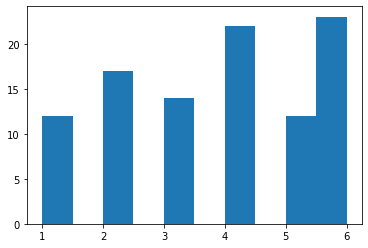

In [11]:
plt.hist(data["value"])
plt.show()

In [12]:
"""
Higher numbers have hight frequency than the small ones
"""

'\nHigher numbers have hight frequency than the small ones\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [13]:
mean_dumb(data["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [14]:
freq_dist=data["value"].value_counts().sort_index()
freq_dist

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<function matplotlib.pyplot.show(*args, **kw)>

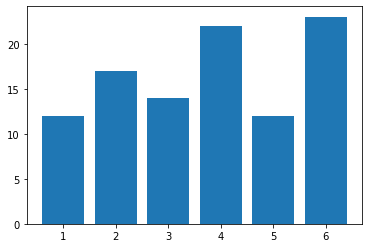

In [15]:
plt.bar(freq_dist.index,freq_dist)
plt.show

In [16]:
"""
same as above
"""

'\nsame as above\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<function matplotlib.pyplot.show(*args, **kw)>

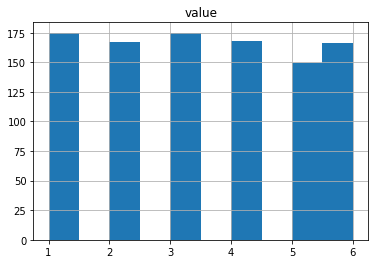

In [17]:
data=pd.read_csv("../data/roll_the_dice_thousand.csv")
data.hist("value")
plt.show

In [18]:
"""
Increasing our sample we get more evenly distributed results with more uniform frequencies
"""

'\nIncreasing our sample we get more evenly distributed results with more uniform frequencies\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

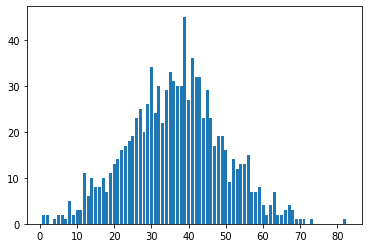

My guess is: mean=35 and std=15


In [19]:
data=pd.read_csv("../data/ages_population.csv")
freq_dist=data["observation"].value_counts().sort_index()
freq_dist

plt.bar(freq_dist.index,freq_dist)
plt.show()

print("My guess is: mean=35 and std=15")

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [20]:
print("real mean", np.mean(data["observation"]))

print("real std", np.std(data["observation"]))

real mean 36.56
real std 12.81008977329979


In [21]:
"""
Very close to my guesses
(I didn't guess as an interval. Sorry.)
"""

"\nVery close to my guesses\n(I didn't guess as an interval. Sorry.)\n"

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

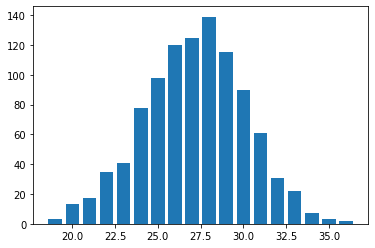

In [22]:
data=pd.read_csv("../data/ages_population2.csv")
freq_dist=data["observation"].value_counts().sort_index()
freq_dist

plt.bar(freq_dist.index,freq_dist)
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [23]:
"""
Higher frequencies
"""

'\nHigher frequencies\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [24]:
print("mean", np.mean(data["observation"]))

print("std", np.std(data["observation"]))

mean 27.155
std 2.9683286543103704


In [25]:
"""
Lower mean and std.
"""

'\nLower mean and std.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

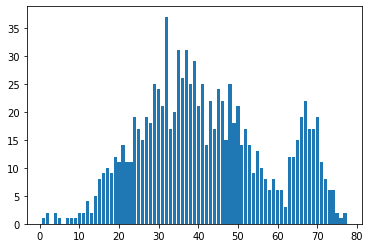

In [26]:
data=pd.read_csv("../data/ages_population3.csv")
freq_dist=data["observation"].value_counts().sort_index()
freq_dist

plt.bar(freq_dist.index,freq_dist)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [27]:
print("mean", np.mean(data["observation"]))

print("std", np.std(data["observation"]))

mean 41.989
std 16.136631587788084


In [28]:
"""
Is more distributed the sample with a lot of observations between 60 and 70 years old
"""

'\nIs more distributed the sample with a lot of observations between 60 and 70 years old\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [29]:

print(data['observation'].quantile([0.25,0.5,0.75,1]))

print("median",np.median(data['observation']))
print("mean",np.mean(data['observation']))


0.25    30.0
0.50    40.0
0.75    53.0
1.00    77.0
Name: observation, dtype: float64
median 40.0
mean 41.989


In [30]:
"""
Since the mean is to the right of the the Q2 (median) it reflects the trend of having a lot of data
arround the 60-70 years old.
"""

'\nSince the mean is to the right of the the Q2 (median) it reflects the trend of having a lot of data\narround the 60-70 years old.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [31]:
x,y=data['observation'].quantile([0.1,0.90])
print(x)
print(y)
print(np.mean(data['observation'])-x)
print(abs(np.mean(data['observation'])-y))

22.0
67.0
19.988999999999997
25.011000000000003


In [32]:
"""
This shows again that the mean is closer to the right.
"""

'\nThis shows again that the mean is closer to the right.\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [33]:
# your code here

In [34]:
"""
your comments here
"""

'\nyour comments here\n'